In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
date = '2017_01_11'
savedir = './Test_processing_Bipul/'#+date+'/'

In [3]:
import glob
import numpy as np
import stephane.tools.rw_data as rw_data
import stephane.tools.browse as browse
import stephane.display.graphes as graphes
import stephane.display.panel as panel
import stephane.manager.access as access

In [4]:
import stephane.Image_processing.tiff as tiff
import scipy.misc as misc
import matplotlib.pyplot as plt
import PIL.Image as Image
import scipy.ndimage.measurements as meas

In [39]:
folder = '/Users/stephane/Documents/Experiences_local/Vortices/Bipul/LightParticles_sv_X0mm_fps2000_lens105mm_piston12mm_v250mms_A0mm_f5Hz_2_File/'

In [40]:
l = glob.glob(folder+'*')
print(l[0])

/Users/stephane/Documents/Experiences_local/Vortices/Bipul/LightParticles_sv_X0mm_fps2000_lens105mm_piston12mm_v250mms_A0mm_f5Hz_2_File/LightParticles_sv_X0mm_fps2000_lens105mm_piston12mm_v250mms_A0mm_f5Hz_20000.tif


In [9]:
filename = tiff.Tiff(l[100])
f = misc.face()
#print(filename)
#print(f)

In [41]:
im0 = Image.open(l[0])
pix0 = im0.load()
H,L = im.size
print(im.size)

(1280, 800)


In [11]:
im = Image.open(l[10])
pix = im.load()
H,L = im.size
print(im.size)

(1280, 800)


TypeError: unsupported operand type(s) for -: 'TiffImageFile' and 'TiffImageFile'

(800, 1280)


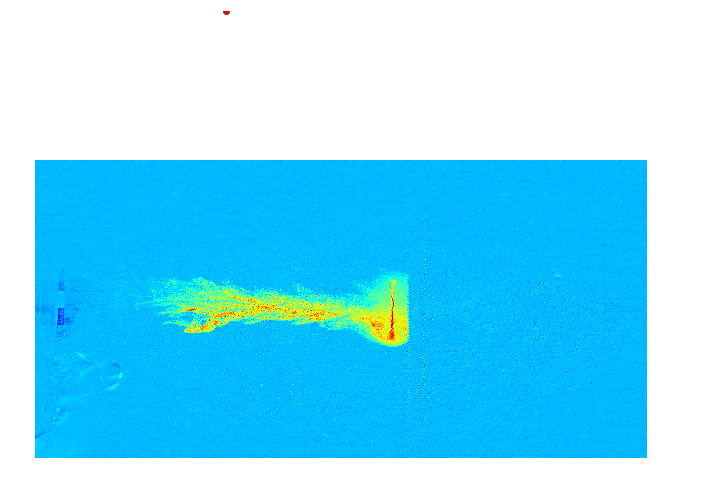

In [52]:
im = Image.open(l[950])
pix = im.load()
H,L = im.size

data = np.asarray([[pix[i,j]-pix0[i,j] for j in range(L)] for i in range(H)])

data = np.transpose(data)
fig,axes = panel.make([111],fignum=1)
fig.set_size_inches(H/100,L/100)

x = range(H)
y = range(L)
X,Y = np.meshgrid(x,y)
print(X.shape)
graphes.color_plot(X,Y,data)
graphes.graph([400],[1200],label='ro')

(1280, 800)


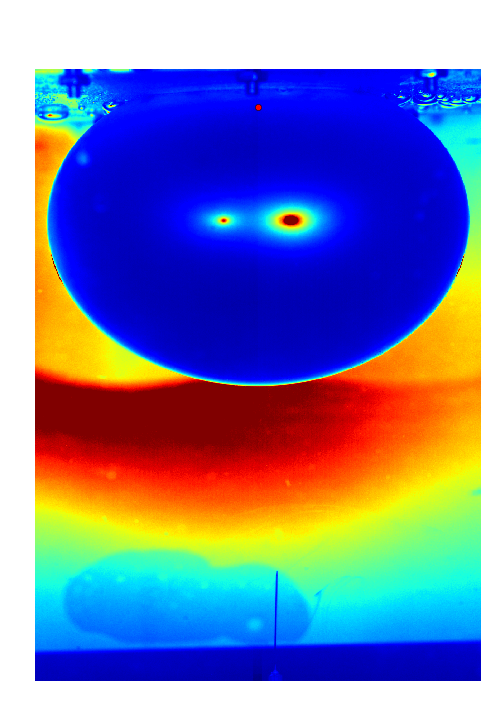

In [57]:
im = Image.open(l[130])
pix = im.load()
H,L = im.size

data = np.asarray([[pix[i,j] for j in range(L)] for i in range(H)])

fig,axes = panel.make([111],fignum=1)
fig.set_size_inches(L/100,H/100)

x = range(L)
y = range(H)
X,Y = np.meshgrid(x,y)
print(X.shape)
graphes.color_plot(X,Y,data)
graphes.graph([400],[1200],label='ro')

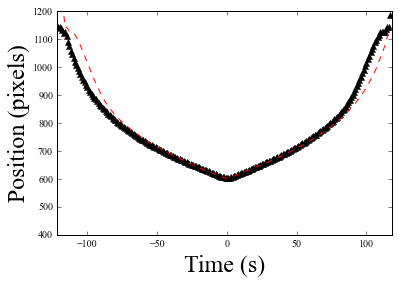

In [210]:
j=400
im = Image.open(l[0])
pix = im.load()
H,L = im.size
y = range(H)

t = range(1,240)
pos = []
for k in t:
    # print(k)
    im = Image.open(l[k])
    pix = im.load()
    line = np.asarray([pix[i,j] for i in range(H)])

    #graphes.graph(y,line,fignum=1)
    #graphes.graph(y[1:],np.diff(line),fignum=2)
    
    imin = np.argmin(np.diff(line))
    
    pos.append(imin)


t = np.asarray(t)
t0 = np.argmin(pos)

graphes.graph(t-t0,pos,label='k^')
graphes.graph(-(t-t0),pos,label='r--')

graphes.set_axis(0-t0,240-t0,400,1200)
fig = graphes.legende('Time (s)','Position (pixels)','')
#fig,axes = panel.make([111],fignum=1)
#fig.set_size_inches(L/100,H/100)

#x = range(L)
#
#X,Y = np.meshgrid(x,y)
#print(X.shape)
#graphes.color_plot(X,Y,data)
#graphes.graph([400,400],[1200,200],label='r-')

1280
(383.83703840297011, 268.05981880749749)


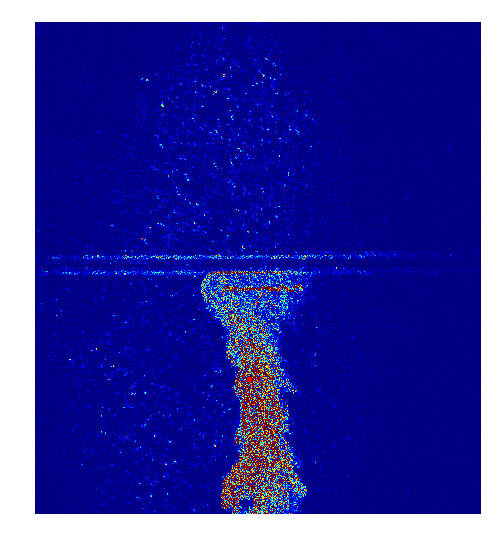

In [54]:
im = Image.open(l[950])
pix = im.load()
H,L = im.size
print(H)
data = np.asarray([[pix[i,j]-pix0[i,j] for j in range(L)] for i in range(300,H)])
H,L = data.shape


grad = np.gradient(data)
fig,axes = panel.make([111],fignum=1)
fig.set_size_inches(L/100,H/100)

x = range(L)
y = range(H)
X,Y = np.meshgrid(x,y)
drop = grad[0]**2+grad[1]**2
#print(X.shape)

Xmean = np.mean(X*drop)/np.mean(drop)
Ymean = np.mean(Y*drop)/np.mean(drop)

print(Xmean,Ymean)
graphes.color_plot(X,Y,drop)
graphes.plt.clim(0,500)
graphes.graph([Xmean],[Ymean],label='ro')

In [121]:
j=400
im0 = Image.open(l[0])
pix = im0.load()
H0,L0 = im0.size

data0 = np.asarray([[pix[i,j] for j in range(L0)] for i in range(300,H0)])
H,L = data.shape

x = range(L)
y = range(H)
X,Y = np.meshgrid(x,y)

t = range(1,240)
pos = []
Xmean = []
Ymean = []

for k in t:
    #print(k)
    im = Image.open(l[k])
    pix = im.load()
    data = np.asarray([[pix[i,j] for j in range(L0)] for i in range(300,H0)])
    grad = np.gradient(data)

    drop = grad[0]**2+grad[1]**2
#print(X.shape)

    Xmean.append(np.mean(X*drop)/np.mean(drop))
    Ymean.append(np.mean(Y*drop)/np.mean(drop))

    #print(Xmean,Ymean)
#graphes.color_plot(X,Y,drop)
#graphes.plt.clim(0,500)
graphes.graph(Xmean,Ymean,label='ro')
graphes.graph(t,Ymean,label='ro',fignum=2)
graphes.graph(t,Xmean,label='ro',fignum=3)

KeyboardInterrupt: 

In [162]:
def interface(k,T=100):
    
    im0 = Image.open(l[0])
    pix = im0.load()
    H,L = im0.size
    data0 = np.asarray([[pix[i,j] for j in range(L)] for i in range(300,1180)])
    H,L = data0.shape


    im = Image.open(l[k])
    pix = im.load()
    data = np.asarray([[pix[i,j] for j in range(L)] for i in range(300,1180)])# - data0
    H,L = data.shape

    grad = np.gradient(data)

    x = range(L)
    y = range(H)
    X,Y = np.meshgrid(x,y)
    drop = grad[0]**2+grad[1]**2

#Xmean = np.mean(X*drop)/np.mean(drop)
#Ymean = np.mean(Y*drop)/np.mean(drop)
#print(Xmean,Ymean)
#N = 10**4
#T = [len(np.where(drop>k)[0]) for k in range(50,N)]
#graphes.graph(range(50,N),T)
#graphes.set_axis(0,N,0,20000)
#T = 100
    #indices = np.where(drop>T)
    databin = drop>T

    label,num = meas.label(databin)
    sizes = [np.sum(label==i) for i in range(1,num)]
    indices = np.where(label==np.argmax(sizes)+1)
    return X[indices],Y[indices]
#indices_2 = np.where(label==np.argmax(sizes)+1)
    #graphes.graph(X[indices],Y[indices],label='k.',fignum=2)
#Xmean = np.mean(X[indices])#*drop[indices])/np.mean(drop[indices])
#Ymean = np.mean(Y[indices])#*drop[indices])/np.mean(drop[indices])
#graphes.graph([Xmean],[Ymean],label='ro',fignum=2)


10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230


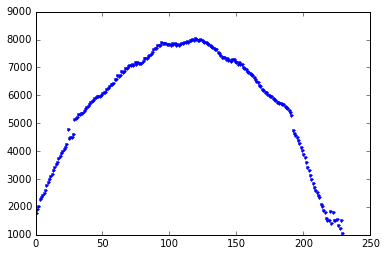

In [172]:
Xpos = []
Ypos = []
for k in range(10,240,1):
    if k%10==0:
        print(k)
    X,Y = interface(k,T=80)
    Xpos.append(X)
    Ypos.append(Y)
#    graphes.graph(X,Y,label='.',fignum=2)
graphes.graph(range(len(Xpos)),[len(X) for X in Xpos],label='.')

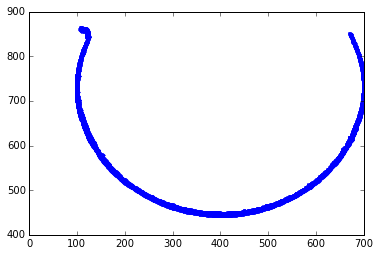

In [175]:
k=50 
graphes.graph(Xpos[k],Ypos[k],label='.')

In [194]:
from scipy import optimize

328.617948035


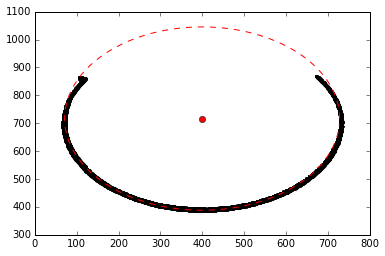

In [206]:
method_2 = "leastsq"

k=70
x = Xpos[k]
y = Ypos[k]

def compute(Xpos,k):
    x_m,y_m = x.mean(),y.mean()

    center_estimate = x_m, y_m
    center_2, ier = optimize.leastsq(f_2, center_estimate)

    xc_2, yc_2 = center_2
    Ri_2       = calc_R(*center_2)
    R_2        = Ri_2.mean()
    residu_2   = sum((Ri_2 - R_2)**2)

    return R_2,xc_2,yc_2,residu_2

def calc_R(xc, yc):
    """ calculate the distance of each 2D points from the center (xc, yc) """
    return np.sqrt((x-xc)**2 + (y-yc)**2)

def f_2(c):
    """ calculate the algebraic distance between the data points and the mean circle centered at c=(xc, yc) """
    Ri = calc_R(*c)
    return Ri - Ri.mean()

R,xc,yc,residu = compute(Xpos,20)

graphes.graph(x,y,label='k.')
graphes.graph([xc],[yc],label='ro')

theta = np.arange(0,2*np.pi,2*np.pi/100)
xfit = R*np.cos(theta)+xc
yfit = R*np.sin(theta)+yc
print(R)
graphes.graph(xfit,yfit,label='r--')
graphes.set_axis(0,800,300,1100)

371.936620485


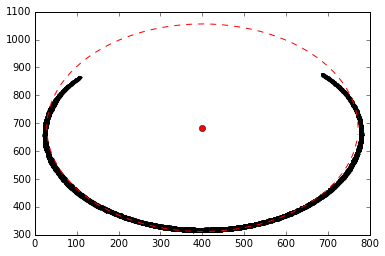

In [207]:
method_2 = "leastsq"

k=120
x = Xpos[k]
y = Ypos[k]

def compute(Xpos,k):
    x_m,y_m = x.mean(),y.mean()

    center_estimate = x_m, y_m
    center_2, ier = optimize.leastsq(f_2, center_estimate)

    xc_2, yc_2 = center_2
    Ri_2       = calc_R(*center_2)
    R_2        = Ri_2.mean()
    residu_2   = sum((Ri_2 - R_2)**2)

    return R_2,xc_2,yc_2,residu_2

def calc_R(xc, yc):
    """ calculate the distance of each 2D points from the center (xc, yc) """
    return np.sqrt((x-xc)**2 + (y-yc)**2)

def f_2(c):
    """ calculate the algebraic distance between the data points and the mean circle centered at c=(xc, yc) """
    Ri = calc_R(*c)
    return Ri - Ri.mean()

R,xc,yc,residu = compute(Xpos,20)

graphes.graph(x,y,label='k.')
graphes.graph([xc],[yc],label='ro')

theta = np.arange(0,2*np.pi,2*np.pi/100)
xfit = R*np.cos(theta)+xc
yfit = R*np.sin(theta)+yc
print(R)
graphes.graph(xfit,yfit,label='r--')
graphes.set_axis(0,800,300,1100)

331.677744101


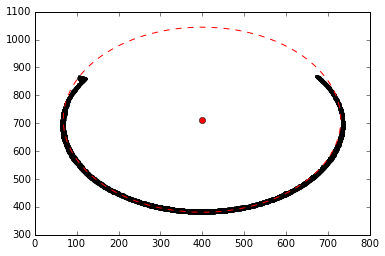

In [208]:
method_2 = "leastsq"

k=150
x = Xpos[k]
y = Ypos[k]

def compute(Xpos,k):
    x_m,y_m = x.mean(),y.mean()

    center_estimate = x_m, y_m
    center_2, ier = optimize.leastsq(f_2, center_estimate)

    xc_2, yc_2 = center_2
    Ri_2       = calc_R(*center_2)
    R_2        = Ri_2.mean()
    residu_2   = sum((Ri_2 - R_2)**2)

    return R_2,xc_2,yc_2,residu_2

def calc_R(xc, yc):
    """ calculate the distance of each 2D points from the center (xc, yc) """
    return np.sqrt((x-xc)**2 + (y-yc)**2)

def f_2(c):
    """ calculate the algebraic distance between the data points and the mean circle centered at c=(xc, yc) """
    Ri = calc_R(*c)
    return Ri - Ri.mean()

R,xc,yc,residu = compute(Xpos,20)

graphes.graph(x,y,label='k.')
graphes.graph([xc],[yc],label='ro')

theta = np.arange(0,2*np.pi,2*np.pi/100)
xfit = R*np.cos(theta)+xc
yfit = R*np.sin(theta)+yc
print(R)
graphes.graph(xfit,yfit,label='r--')
graphes.set_axis(0,800,300,1100)